In [23]:
import io
import os
import string
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [24]:
# It is important to use io.open to correctly load the file as UTF-8
d = os.path.expanduser("~/Dropbox/insight/Emoji/")
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/happy-emoji.txt")
text = io.open(fullfile).read()
text = io.open(path.join(d, 'happy-emoji.txt')).read()

In [25]:
text = "😅 🤓 😙 😅 😙 😅 😕 😕 🤡 😅"

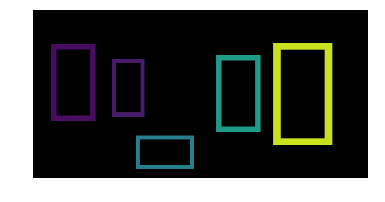

In [27]:
# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join("/System/Library/Fonts/",'Apple\ Color\ Emoji.ttc')
# wordcloud = WordCloud(font_path=font_path, regexp=regexp).generate(text)
wordcloud = WordCloud(regexp=regexp).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### GENRATE WORDCLOUD FROM MODEL per emoji...

In [ ]:

wordcloud = WordCloud.generate(text)
